<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/mod06_tarefa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
sinasc = pd.read_csv('//content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Python em Ciência de Dados/Descritiva I/b1abb33c4f.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

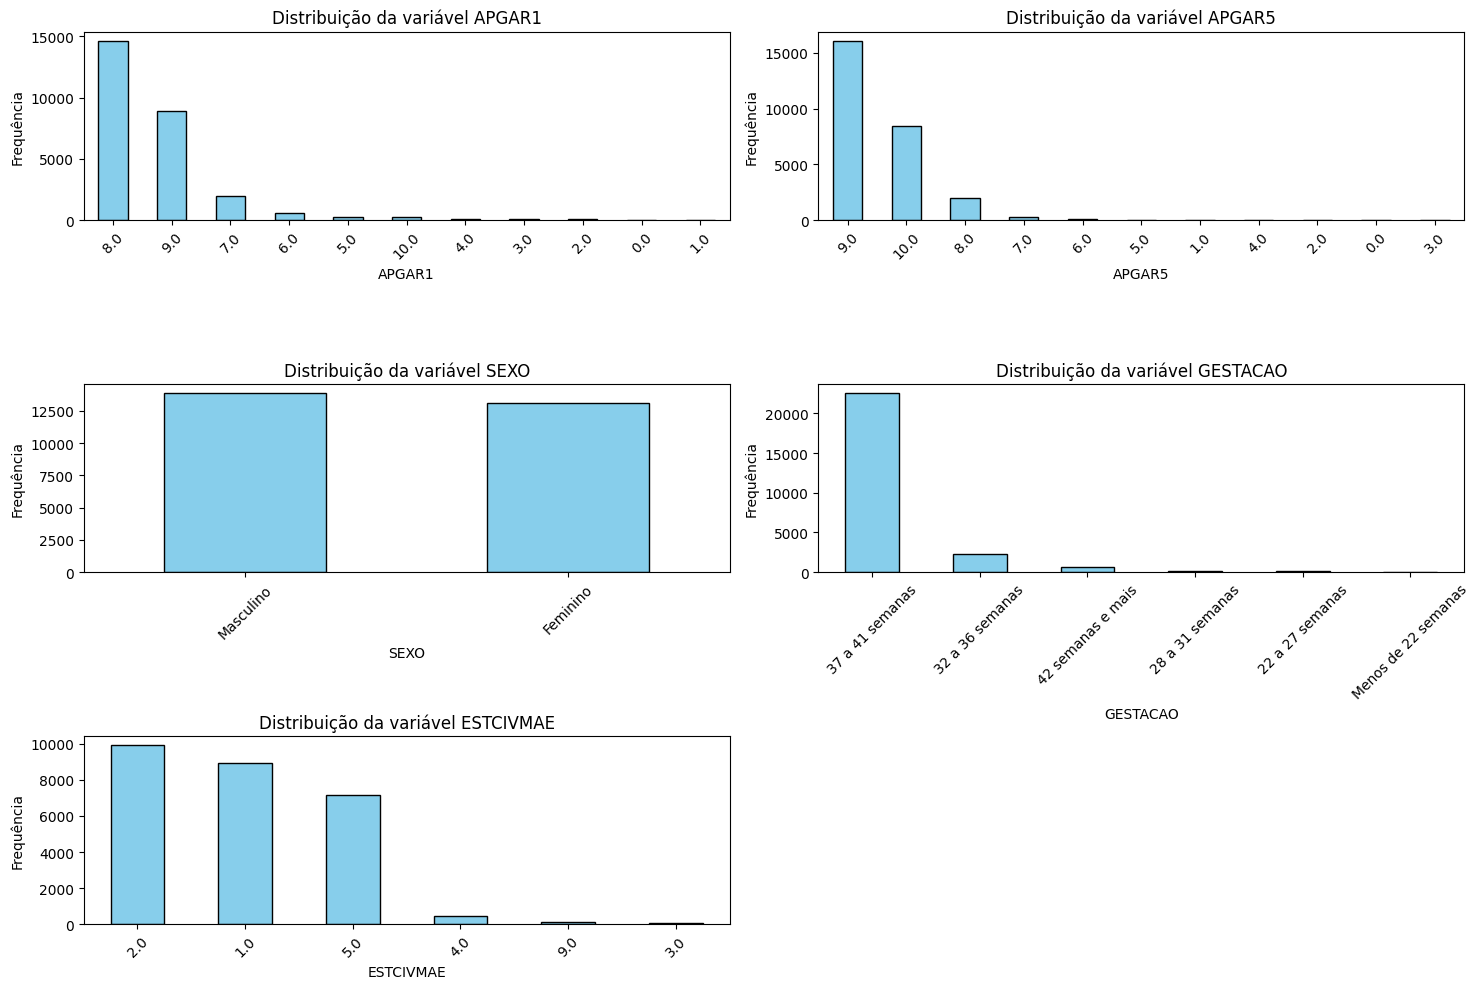

In [31]:
selected_columns = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']
subset_sinasc = sinasc[selected_columns]
plt.figure(figsize=(15, 10))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(3, 2, i)
    subset_sinasc[column].value_counts(dropna=True).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribuição da variável {column}")
    plt.xlabel(column)
    plt.ylabel("Frequência")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

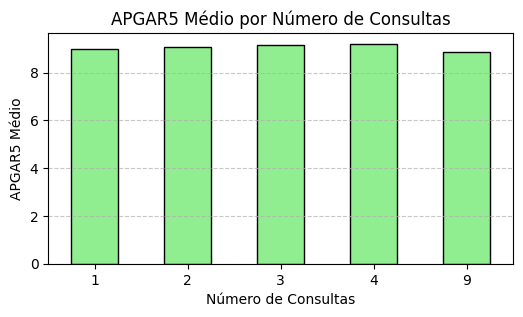

In [29]:
subset_consultas = sinasc[['APGAR5', 'CONSULTAS']].dropna()

# Calcular o APGAR5 médio por número de consultas
apgar5_por_consultas = subset_consultas.groupby('CONSULTAS')['APGAR5'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(6, 3))
apgar5_por_consultas.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("APGAR5 Médio por Número de Consultas")
plt.xlabel("Número de Consultas")
plt.ylabel("APGAR5 Médio")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

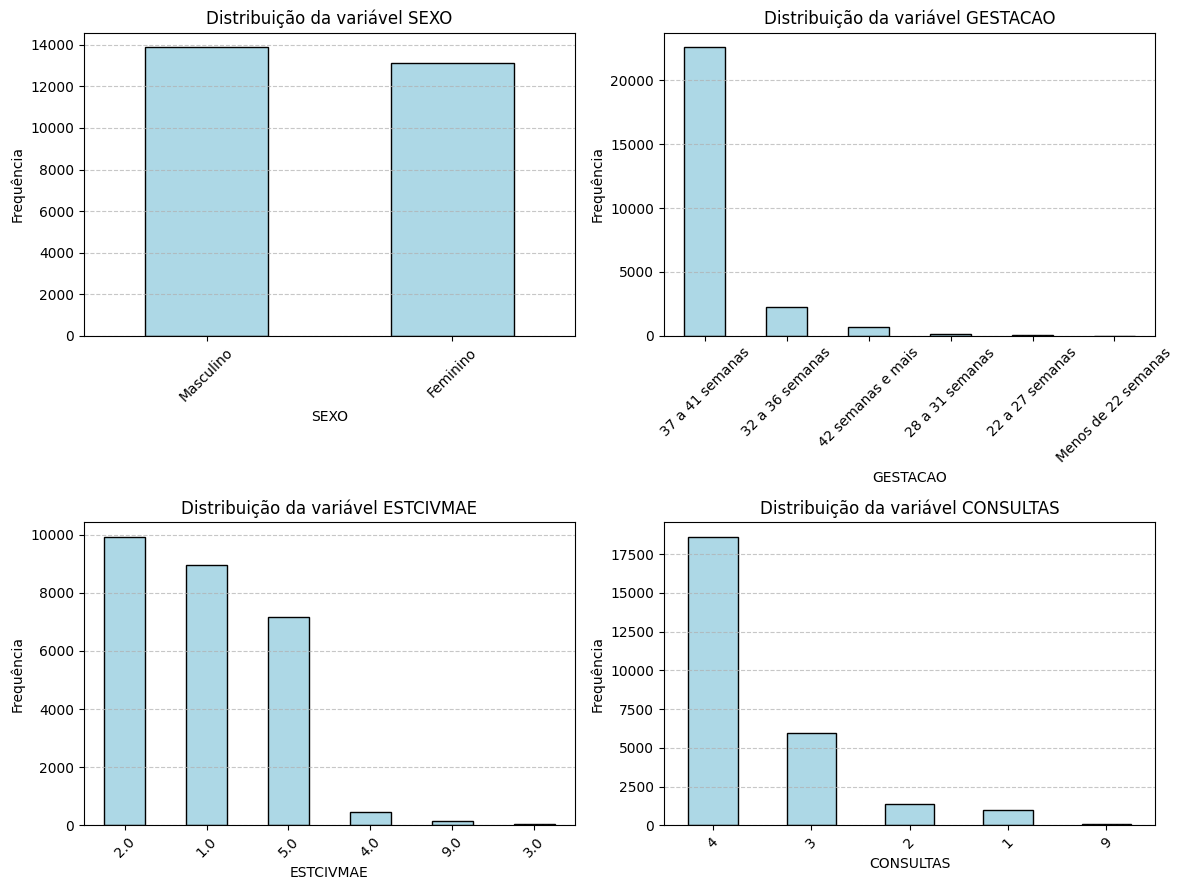

In [41]:
columns_for_panel = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']
subset_sinasc1 = sinasc[columns_for_panel]

# Configurações gerais do painel
plt.figure(figsize=(12, 9))

# Criar gráficos de barras para cada variável
for i, column in enumerate(columns_for_panel, 1):
    plt.subplot(2, 2, i)
    subset_sinasc1[column].value_counts(dropna=True).plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title(f"Distribuição da variável {column}")
    plt.xlabel(column)
    plt.ylabel("Frequência")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout
plt.tight_layout()
plt.show()
